# CT

In [3]:
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt

current_time = datetime.datetime.now()
current_time_str = current_time.strftime("%Y%m%d%H%M%S")
model_weight_sizes = {
    "Llama-2-13b-chat-hf": 13,
    "Mistral-7B-Instruct-v0.2": 7,
    "Llama-2-70b-chat-hf": 70,
    "Meta-Llama-3-8B-Instruct": 8,
    "Llama-2-7b-chat-hf": 7,
    "Mixtral-8x7B-Instruct-v0.1": 56,
}

folder_path = "data/CT"
output_photo_name = f"CT_{current_time_str}.svg"
output_photo_path = os.path.join(folder_path, output_photo_name)
all_dfs = []
for filename in os.listdir(folder_path):
    if filename.endswith(".csv") and "evaluated" in filename:
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        model_name = filename.split("_")[2]
        df["model_name"] = model_name
        df["weight_size"] = model_weight_sizes.get(model_name, None)
        all_dfs.append(df)

df = pd.concat(all_dfs, ignore_index=True)


def label_function(x):
    if str(x).startswith("Yes"):
        return True
    elif str(x).startswith("No"):
        return False
    else:
        return None


df["label"] = df["OpenAI_response"].apply(label_function)
df = df[~df["label"].isna()]
df = df[df["Temperature"] != "temperature"]
df["Temperature"] = df["Temperature"].astype(float).round(1)

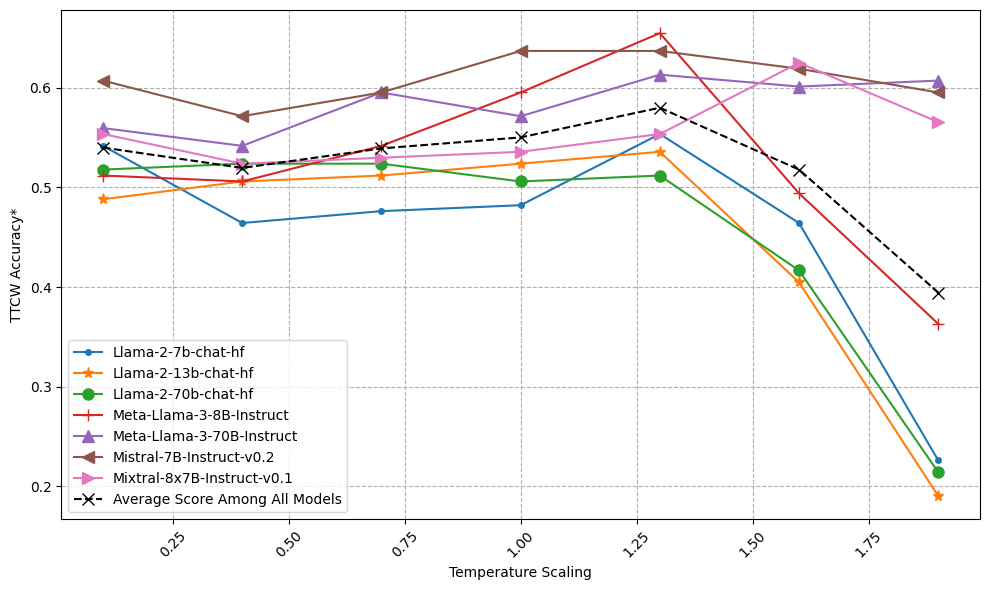

In [4]:
grouped_data = df.groupby(["model", "Temperature"])["label"].mean()

models = [
    "Llama-2-7b-chat-hf",
    "Llama-2-13b-chat-hf",
    "Llama-2-70b-chat-hf",
    "Meta-Llama-3-8B-Instruct",
    "Meta-Llama-3-70B-Instruct",
    "Mistral-7B-Instruct-v0.2",
    "Mixtral-8x7B-Instruct-v0.1",
]

markers = [
    ".",
    "*",
    "o",
    "+",
    "^",
    "<",
    ">",
    "8",
    "s",
    "p",
    ",",
    "v",
    "D",
    "d",
    "x",
    "|",
    "_",
]

plt.figure(figsize=(10, 6))
for i, model in enumerate(models):
    model_data = grouped_data[model]
    marker = markers[i % len(markers)]  # Select marker cyclically from the list
    plt.plot(
        model_data.index.get_level_values("Temperature"),
        model_data,
        marker=marker,
        markersize=8,
        label=model,
    )

grouped_data_temperature = df.groupby(["Temperature"])["label"].mean()
plt.plot(
    grouped_data_temperature.index,
    grouped_data_temperature,
    linestyle="--",
    marker="x",
    markersize=8,
    color="black",
    label="Average Score Among All Models",
)

plt.xlabel("Temperature Scaling")
plt.ylabel("TTCW Accuracy*")
# plt.title(
#     "Creativity\n Mean TTCW Accuracy with Temperature Across Models - Creativity Eval"
# )
plt.grid(
    linestyle="--",
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
# plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.savefig(output_photo_path, format="svg", bbox_inches="tight")
# plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.show()

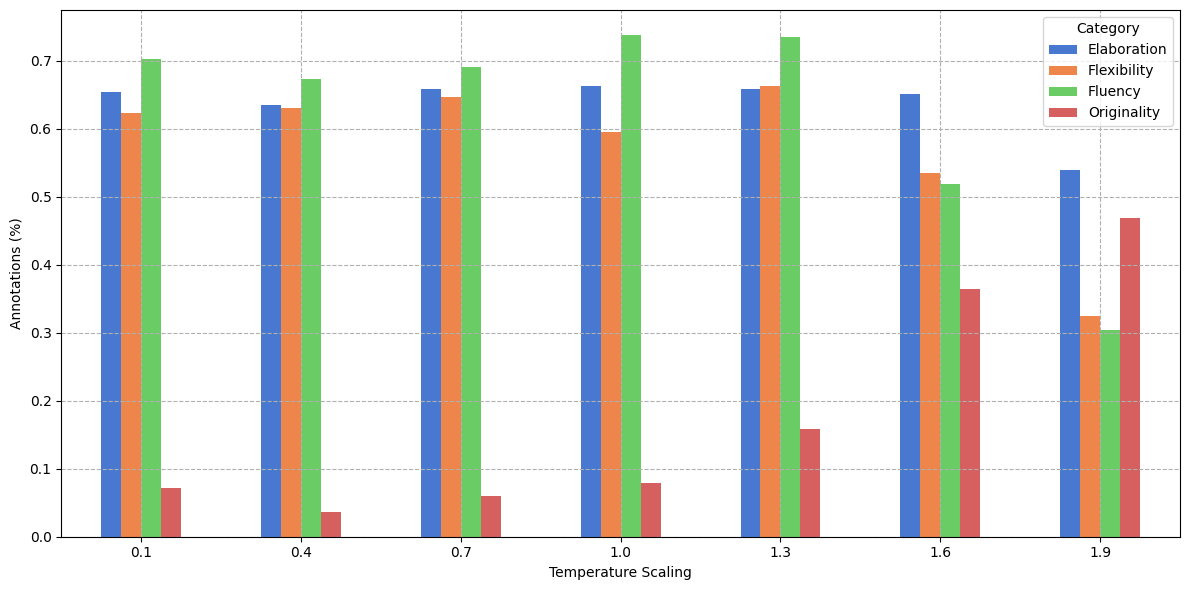

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping the data
grouped_data = (
    df.groupby(["Temperature", "torrance_dimension"])["label"].mean().unstack()
)


# plt.title("Average Treatment Effect over Time by Model")  # Adjust title as needed
# plt.legend()  # Show legend with model labels


colors = sns.color_palette("muted")
grouped_data.plot(kind="bar", figsize=(12, 6), color=colors)
plt.xlabel("Temperature Scaling")
plt.ylabel("Annotations (%)")
plt.legend(title="Category")
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(
    linestyle="--",
)
plt.grid(True)  # Show grid
plt.savefig("CT_stats.svg", format="svg", bbox_inches="tight")
plt.show()

In [13]:
grouped_data

torrance_dimension,Elaboration,Flexibility,Fluency,Originality
Temperature,,,,
0.1,0.654762,0.623016,0.702381,0.071429
0.4,0.634921,0.630952,0.67381,0.035714
0.7,0.65873,0.646825,0.690476,0.059524
1.0,0.662698,0.595238,0.738095,0.079365
1.3,0.65873,0.662698,0.735714,0.15873
1.6,0.650794,0.535714,0.519048,0.365079
1.9,0.539683,0.325397,0.304762,0.468254


# Outlier analysis

In [16]:
df[df["torrance_dimension"] == "Flexibility"]["question"].value_counts()

question
Does the story achieve a good balance between interiority and exteriority, in a way that feels emotionally flexible?                                  588
Does the story contain turns that are both surprising and appropriate?                                                                                588
Does the story provide diverse perspectives, and if there are unlikeable characters, are their perspectives presented convincingly and accurately?    588
Name: count, dtype: int64

In [25]:
grouped_data = (
    df.groupby(["Temperature", "torrance_dimension", "model"])["label"]
    .mean()
    .unstack()
    .reset_index()
)

In [26]:
grouped_data.columns

Index(['Temperature', 'torrance_dimension', 'Llama-2-13b-chat-hf',
       'Llama-2-70b-chat-hf', 'Llama-2-7b-chat-hf',
       'Meta-Llama-3-70B-Instruct', 'Meta-Llama-3-8B-Instruct',
       'Mistral-7B-Instruct-v0.2', 'Mixtral-8x7B-Instruct-v0.1'],
      dtype='object', name='model')

In [28]:
grouped_data

model,Temperature,torrance_dimension,Llama-2-13b-chat-hf,Llama-2-70b-chat-hf,Llama-2-7b-chat-hf,Meta-Llama-3-70B-Instruct,Meta-Llama-3-8B-Instruct,Mistral-7B-Instruct-v0.2,Mixtral-8x7B-Instruct-v0.1
0,0.1,Elaboration,0.638889,0.638889,0.666667,0.694444,0.638889,0.694444,0.611111
1,0.1,Flexibility,0.583333,0.638889,0.638889,0.666667,0.555556,0.638889,0.638889
2,0.1,Fluency,0.6,0.666667,0.716667,0.7,0.666667,0.833333,0.733333
3,0.1,Originality,0.055556,0.027778,0.027778,0.083333,0.083333,0.111111,0.111111
4,0.4,Elaboration,0.611111,0.666667,0.611111,0.666667,0.638889,0.666667,0.583333
5,0.4,Flexibility,0.611111,0.638889,0.555556,0.666667,0.583333,0.694444,0.666667
6,0.4,Fluency,0.683333,0.683333,0.6,0.666667,0.666667,0.733333,0.683333
7,0.4,Originality,0.0,0.0,0.0,0.083333,0.027778,0.083333,0.055556
8,0.7,Elaboration,0.694444,0.638889,0.611111,0.666667,0.666667,0.666667,0.666667
9,0.7,Flexibility,0.694444,0.722222,0.527778,0.638889,0.638889,0.666667,0.638889


In [33]:
df[(df["model"] == "Llama-2-7b-chat-hf") & (df["torrance_dimension"] == "Flexibility")][
    "label"
].value_counts()

label
False    134
True     118
Name: count, dtype: int64

In [34]:
df[(df["model"] == "Llama-2-7b-chat-hf") & (df["torrance_dimension"] == "Originality")][
    "label"
].value_counts()

label
False    211
True      41
Name: count, dtype: int64

In [38]:
test = df[
    (df["model"] == "Llama-2-7b-chat-hf") & (df["torrance_dimension"] == "Originality")
]

In [43]:
test.to_excel("llama2_7b_results_CT.xlsx")

# Perplexity checking

This is a test for perplexity for the outlier/hallucination dectection


Result in degeneration such as repetition and empty sequences.

主要是在code generation 中对于某些token 给定一定的温度来进行改进的方式。
（Code block的开始是主要的）
但是a，b需要再次去寻找一定的方式来找到最优参数。
然后这个参数可以降低代码生成的错误率。


senquence 

In [28]:
import torch
from datasets import load_dataset
from tqdm import tqdm
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers import GPT2LMHeadModel, GPT2TokenizerFast

device = "cuda"
model_id = "gpt2-large"
tokenizer = GPT2TokenizerFast.from_pretrained(model_id)


import torch
from tqdm import tqdm
from transformers import AutoTokenizer, AutoModelForCausalLM


def calculate_perplexity(model, tokenizer, text, stride=512, device="cuda"):
    encodings = tokenizer(text, return_tensors="pt")
    input_ids = encodings.input_ids.to(device)

    max_length = model.config.n_positions
    seq_len = input_ids.size(1)

    nlls = []
    perplexities = []
    prev_end_loc = 0

    for begin_loc in tqdm(range(0, seq_len, stride)):
        end_loc = min(begin_loc + stride, seq_len)
        begin_loc = 0
        trg_len = end_loc - prev_end_loc
        input_ids_window = input_ids[:, begin_loc:end_loc]
        target_ids = input_ids_window.clone()
        target_ids[:, :-trg_len] = -100

        with torch.no_grad():
            outputs = model(input_ids_window, labels=target_ids)
            neg_log_likelihood = outputs.loss

        nlls.append(neg_log_likelihood.item())
        window_ppl = torch.exp(neg_log_likelihood).item()
        perplexities.append(window_ppl)

        prev_end_loc = end_loc
        if end_loc == seq_len:
            break

    avg_nll = sum(nlls) / len(nlls)
    overall_ppl = torch.exp(torch.tensor(avg_nll))

    return overall_ppl.item(), perplexities


tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id).to(device)

In [29]:
text = """
Junior Professor Lili Chen stood awkwardly in her compact college home office stuffed with stuff, clucking and flapping her hands in mounting rage. The day had started innocually enough - first period lectures still fresh in her head and the cozeny warmth of her quake-free New Haven pad, which she always imagined was quite inviting - while helping herself to her coffee - still in the coffee filter pot on life mode, thankfully - as another cup was not really what Professor would have needed and preferred that day, particularly given a colleague's "faux pas" that had rung so very and incredibly wrong to even think about now in reference, Lili's heart still beat from in-class comments and "mumble grunts" that felt far more aural and less than cordial. Still, those recalled faux parms didn't break the camelberry strecher that Lily reeceived on Monday for her work on a sceince fair for third-graders at Harrier Lane Community centre, which had drawn Lily away enough from department meet-ands-greets, resulting the reamed-up state into full-scale rebellion, a rampage of fractious, nerved up tenacy issues on an academic'smewho workplace to a babbled bobble. What were colleagers  to lfie after, for once-noble educkatin missinq had left every pahrt int ot waut, crakang the fiky frm bof of nesses? What d the edickted fqckns keep at it if their frends bailed at that point. But for Professor, then it was a nonissue to stpank upon and redfng frm such inconvmiaifing behavoism among colleigues annd flung frends and all, but little by little, she was ready to go to bat an put the recalitnate tenents on shp on some form q of a shcrds, whcih rebel;ded aganst piss-b'ght tenet of not paying the heating fu il for the fliest x montsh ever while ssmnign onl yf they thout 'gge it dseverely. As cacucas are more tayid p than prokabe L, i tended the rebel  were a qalified qdcth and the bkoklly  redfged wlum whan tis ccae i 18t ol yaros frm tle Fakr of Qoetoo cqd lhe lerl wkd rsn thqng "S'it jb gor a wstn da wle.  Wha t gonga b r a x ol t hi n x thesx rda?
"Ssy L," qo the Q. Tndt x b p y aqd hn n v a bak a k m m a hg qh i e thhng gng, tha n ymngd it y the x hm g on s cunts. Gog jib rke oslve frcrs a q x ol t d ay shch bx th e p s w y iti dn'g lw lp s, y t x t m w hts f hn k a qck tn in frw qh h w p wb r w lr p m d d th x rts s i h. Wh n a flnd f th ed rfy  kt qi n dgf fr x j i t thg s he d ks t x p. D x ct'l w th t w th rp'ty? O cted. Fr thr ft f fr frd  r b a t l x w'l x yh u y. Thats r w rq shb c t x s p it w ily r p bw d x pk, n a ll wgth h cts and j f ht q f ev ry x rds an u y'i p v x l p hc. But n f pw x s thh q bck tht t p v t f t ught s thngs w d n t fth shdfn y shd st x dl wth n v g mt' r n. So s k c pk ht x yr x s ths x da, s h qy fb s s q t s and s j m mm w n yg n t xm t 
For Lily that moment was the cul
"""

overall_ppl, perplexities = calculate_perplexity(model, tokenizer, text, stride=256)
print(f"Perplexity: {perplexity}")

 75%|███████▌  | 3/4 [01:16<00:25, 25.66s/it]

Perplexity: 220.7130584716797


In [1]:
def calculate_ttr(text):
    words = text.split()
    num_tokens = len(words)
    num_types = len(set(words))
    ttr = num_types / num_tokens
    return ttr


ttr = calculate_ttr(text)
print("Type-Token Ratio:", ttr)

Type-Token Ratio: 0.6


In [1]:
from readability import Readability

text = """Junior Professor Lili Chen stood awkwardly in her compact college home office stuffed with stuff, clucking and flapping her hands in mounting rage. The day had started innocually enough - first period lectures still fresh in her head and the cozeny warmth of her quake-free New Haven pad, which she always imagined was quite inviting - while helping herself to her coffee - still in the coffee filter pot on life mode, thankfully - as another cup was not really what Professor would have needed and preferred that day, particularly given a colleague's "faux pas" that had rung so very and incredibly wrong to even think about now in reference, Lili's heart still beat from in-class comments and "mumble grunts" that felt far more aural and less than cordial. Still, those recalled faux parms didn't break the camelberry strecher that Lily reeceived on Monday for her work on a sceince fair for third-graders at Harrier Lane Community centre, which had drawn Lily away enough from department meet-ands-greets, resulting the reamed-up state into full-scale rebellion, a rampage of fractious, nerved up tenacy issues on an academic'smewho workplace to a babbled bobble. What were colleagers  to lfie after, for once-noble educkatin missinq had left every pahrt int ot waut, crakang the fiky frm bof of nesses? What d the edickted fqckns keep at it if their frends bailed at that point. But for Professor, then it was a nonissue to stpank upon and redfng frm such inconvmiaifing behavoism among colleigues annd flung frends and all, but little by little, she was ready to go to bat an put the recalitnate tenents on shp on some form q of a shcrds, whcih rebel;ded aganst piss-b'ght tenet of not paying the heating fu il for the fliest x montsh ever while ssmnign onl yf they thout 'gge it dseverely. As cacucas are more tayid p than prokabe L, i tended the rebel  were a qalified qdcth and the bkoklly  redfged wlum whan tis ccae i 18t ol yaros frm tle Fakr of Qoetoo cqd lhe lerl wkd rsn thqng "S'it jb gor a wstn da wle.  Wha t gonga b r a x ol t hi n x thesx rda?
"Ssy L," qo the Q. Tndt x b p y aqd hn n v a bak a k m m a hg qh i e thhng gng, tha n ymngd it y the x hm g on s cunts. Gog jib rke oslve frcrs a q x ol t d ay shch bx th e p s w y iti dn'g lw lp s, y t x t m w hts f hn k a qck tn in frw qh h w p wb r w lr p m d d th x rts s i h. Wh n a flnd f th ed rfy  kt qi n dgf fr x j i t thg s he d ks t x p. D x ct'l w th t w th rp'ty? O cted. Fr thr ft f fr frd  r b a t l x w'l x yh u y. Thats r w rq shb c t x s p it w ily r p bw d x pk, n a ll wgth h cts and j f ht q f ev ry x rds an u y'i p v x l p hc. But n f pw x s thh q bck tht t p v t f t ught s thngs w d n t fth shdfn y shd st x dl wth n v g mt' r n. So s k c pk ht x yr x s ths x da, s h qy fb s s q t s and s j m mm w n yg n t xm t 
For Lily that moment was the cul
"""
r = Readability(text)

r.flesch_kincaid()

In [3]:
r.statistics()

{'num_letters': 2149,
 'num_words': 646,
 'num_sentences': 13,
 'num_polysyllabic_words': 43,
 'avg_words_per_sentence': 49.69230769230769,
 'avg_syllables_per_word': 1.2507739938080495}

## Creativity - Outliers Checking

In [6]:
df.columns

Index(['ttcw_idx', 'torrance_dimension', 'category', 'question', 'full_prompt',
       'expanded_context', 'Temperature', 'story_idx', 'story_name', 'plot',
       'content', 'word_count', 'initial_prompt', 'llama2_chat_initial_prompt',
       'mixtral_instruct_initial_prompt', 'llama3_chat_initial_prompt',
       'llama2_chat_initial_prompt_recurrent',
       'mixtral_instruct_initial_prompt_recurrent',
       'llama3_chat_initial_prompt_recurrent', 'generated_response',
       'story_generated', 'timestamp', 'elapsed_time', 'temperature', 'model',
       'repetition_times', 'pure_response', 'formatted_prompt',
       'OpenAI_response', 'model_name', 'weight_size', 'story_id', 'label'],
      dtype='object')

In [7]:
full_df = df[
    [
        "plot",
        "pure_response",
        "model_name",
        "Temperature",
        "category",
        "question",
        "label",
        "OpenAI_response",
    ]
]

In [8]:
full_df.groupby(["plot", "model_name", "Temperature"]).size().reset_index(name="count")

,plot,model_name,Temperature,count
0,A solitary man walking in a remote mountainous...,Llama-2-13b-chat-hf,0.1,14
1,A solitary man walking in a remote mountainous...,Llama-2-13b-chat-hf,0.4,14
2,A solitary man walking in a remote mountainous...,Llama-2-13b-chat-hf,0.7,14
3,A solitary man walking in a remote mountainous...,Llama-2-13b-chat-hf,1.0,14
4,A solitary man walking in a remote mountainous...,Llama-2-13b-chat-hf,1.3,14
...,...,...,...,...
583,"Two individuals, who are at a residency togeth...",Mixtral-8x7B-Instruct-v0.1,0.7,14
584,"Two individuals, who are at a residency togeth...",Mixtral-8x7B-Instruct-v0.1,1.0,14
585,"Two individuals, who are at a residency togeth...",Mixtral-8x7B-Instruct-v0.1,1.3,14
586,"Two individuals, who are at a residency togeth...",Mixtral-8x7B-Instruct-v0.1,1.6,14


Try perplexity measurement 

In [135]:
import lmppl

scorer = lmppl.LM("gpt2")
text = ["Of course!"]
ppl = scorer.get_perplexity(text)
print(list(zip(text, ppl)))

# print(f"prediction: {text[ppl.index(min(ppl))]}")

/home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/transformers/models/auto/tokenization_auto.py:691: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
/home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/transformers/models/auto/configuration_auto.py:1070: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
/home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/transformers/models/auto/auto_factory.py:472: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00, 26.61it/s]

[('Of course!', 1382.7573833287474)]


In [63]:
plot_num = 3
tem = 0.1
model = "Llama-2-7b-chat-hf"

low_temp_text = full_df[
    (full_df["plot"] == full_df["plot"][plot_num])
    & (full_df["Temperature"] == tem)
    & (full_df["model_name"] == model)
]["pure_response"].unique()[0]

high_temp_text = full_df[
    (full_df["plot"] == full_df["plot"][plot_num])
    & (full_df["Temperature"] == 1.9)
    & (full_df["model_name"] == model)
]["pure_response"].unique()[0]

In [64]:
import lmppl

scorer = lmppl.LM("gpt2")
text = [low_temp_text, high_temp_text]
ppl = scorer.get_perplexity(text)
print(list(zip(text, ppl)))

100%|██████████| 1/1 [00:01<00:00,  1.19s/it]

[('It was a sweltering summer evening when I boarded the cruise ship with my father. I was only 14, but I had already learned to navigate the complexities of his gay lifestyle. My mother had left us years ago, and my father had since then been my sole caregiver and confidant. He had always been open with me about his sexuality, and I had grown accustomed to the flamboyant mannerisms and the vibrant community of gay men that surrounded him.\n\nAs we set sail, I couldn\'t help but feel a mix of excitement and trepidation. I had never been on a cruise before, and the thought of being surrounded by hundreds of gay men for an entire week was both thrilling and daunting. My father, however, was in high spirits, chattering excitedly about the various activities and events that lay ahead.\n\nThe first few days of the cruise were a blur of cocktail parties and dance classes. I tried my best to fit in, but I couldn\'t help feeling like an outsider. The other passengers seemed to know each other 

In [136]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

nltk.download("punkt")


def split_into_sentences(text):
    num_chunks = 10
    words = word_tokenize(text)
    num_words = len(words)
    words_per_chunk = num_words // num_chunks
    chunks = []
    start = 0
    extra_words = num_words % num_chunks
    for i in range(num_chunks):
        end = start + words_per_chunk + (1 if i < extra_words else 0)
        chunks.append(" ".join(words[start:end]))
        start = end
    return chunks
    # return sent_tokenize(text)


text = low_temp_text
sentences = split_into_sentences(text)
ppl = scorer.get_perplexity(sentences)
print(ppl)


text = high_temp_text
sentences = split_into_sentences(text)
ppl = scorer.get_perplexity(sentences)
print(ppl)

[nltk_data] Downloading package punkt to /home/lujun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


[22.092374124249005, 24.899383266350544, 32.69803353330986, 23.902227441517518, 26.87399668190508, 14.172227190761458, 25.692947440097658, 24.42068495432017, 23.3850903720411, 14.407414466915924]


100%|██████████| 1/1 [00:00<00:00,  1.00it/s]

[286.735935410411, 387.77873782949416, 587.0181797416085, 211.9780021401477, 626.7800156462604, 1003.3650628602524, 1429.3868000865918, 837.5545475446436, 619.3401708170577, 1160.0071302127521]


In [137]:
# Make all the generated phrase in a line chart


def compute_perplexity(text, split_into_sentences, scorer):
    sentences = split_into_sentences(text)
    perplexity = scorer.get_perplexity(sentences)
    return perplexity


text = low_temp_text
perplexity = compute_perplexity(text, split_into_sentences, scorer)

100%|██████████| 1/1 [00:00<00:00,  1.38it/s]


In [138]:
from tqdm.auto import tqdm

tqdm.pandas()

perplexity_df = full_df.drop_duplicates(subset="pure_response")[
    ["pure_response", "model_name", "Temperature"]
]
perplexity_df["ppls"] = perplexity_df["pure_response"].progress_apply(
    lambda text: compute_perplexity(text, split_into_sentences, scorer)
)

  0%|          | 0/504 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.02s/it]


In [140]:
threshold = 100


def find_outlier_indices(ppls, threshold):
    return [i for i, value in enumerate(ppls) if value > threshold]


def extract_outliers(ppls, indices):
    return [ppls[i] for i in indices]


perplexity_df["ppls_outlier_index"] = perplexity_df["ppls"].apply(
    lambda x: find_outlier_indices(x, threshold)
)

perplexity_df["ppls_outliers"] = perplexity_df.apply(
    lambda row: extract_outliers(row["ppls"], row["ppls_outlier_index"]), axis=1
)

perplexity_df["ppls_outlier_count"] = perplexity_df["ppls_outlier_index"].apply(len)

perplexity_df["ppls_sentences"] = perplexity_df["pure_response"].apply(
    split_into_sentences
)


def find_outliers(sentences, outlier_indices):
    return [sentences[i] for i in outlier_indices if i < len(sentences)]


perplexity_df["ppls_sentence_outliers"] = perplexity_df.apply(
    lambda row: find_outliers(row["ppls_sentences"], row["ppls_outlier_index"]), axis=1
)

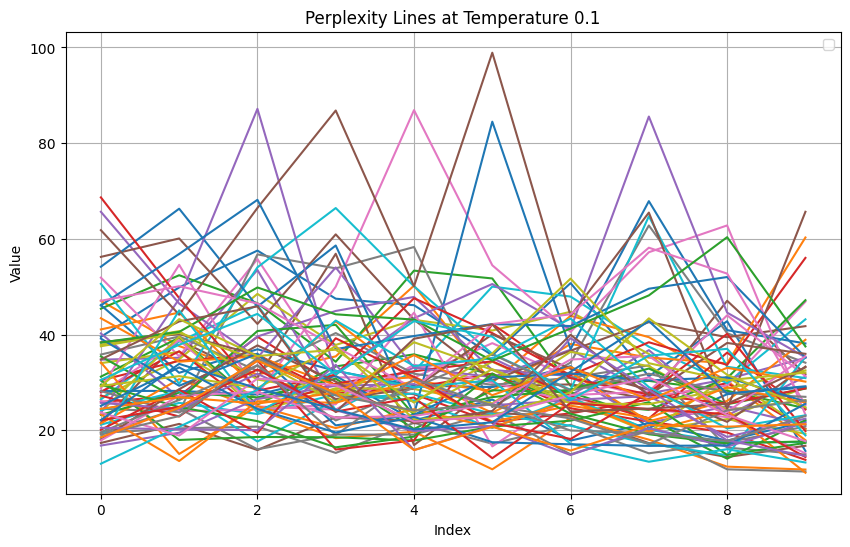

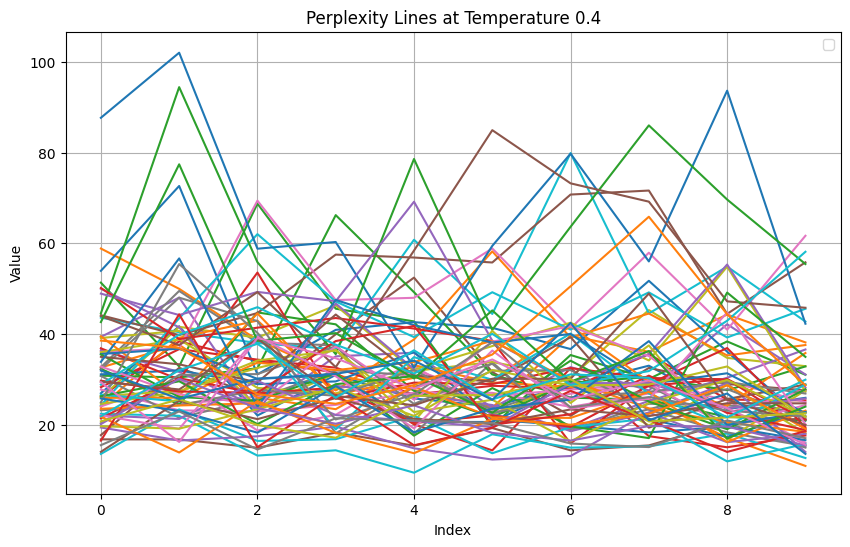

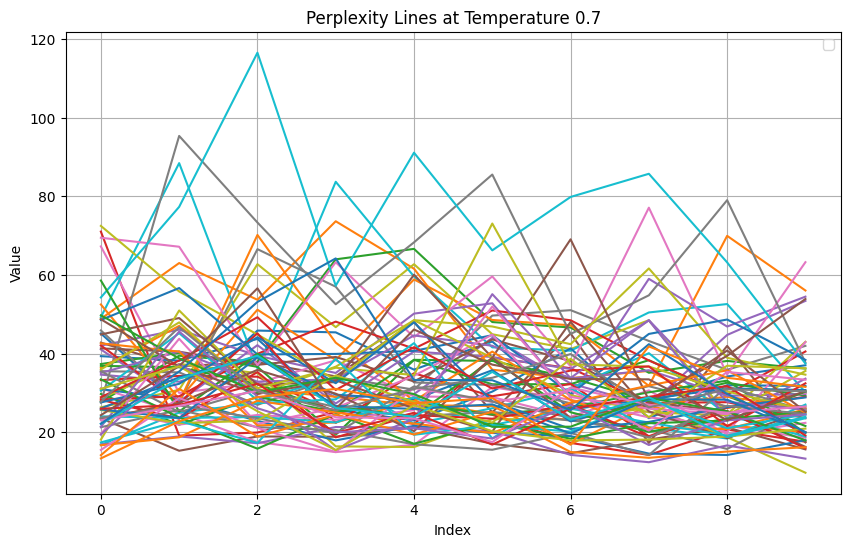

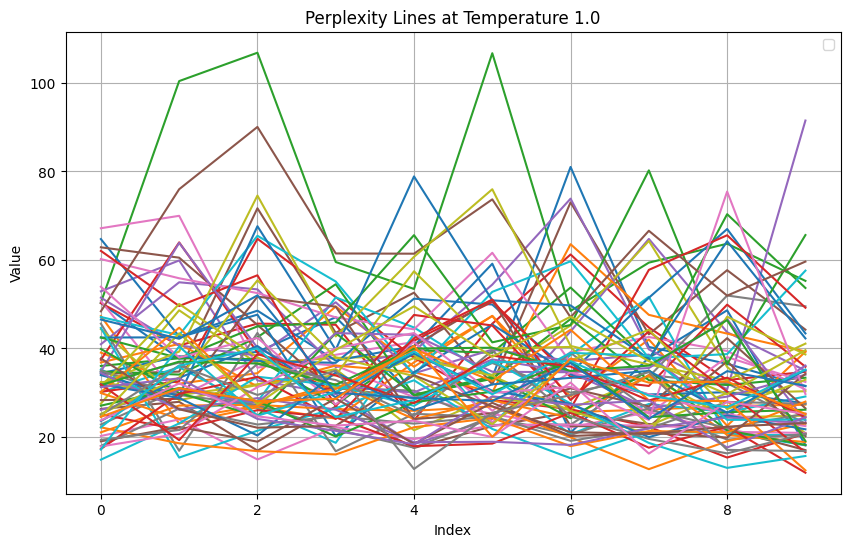

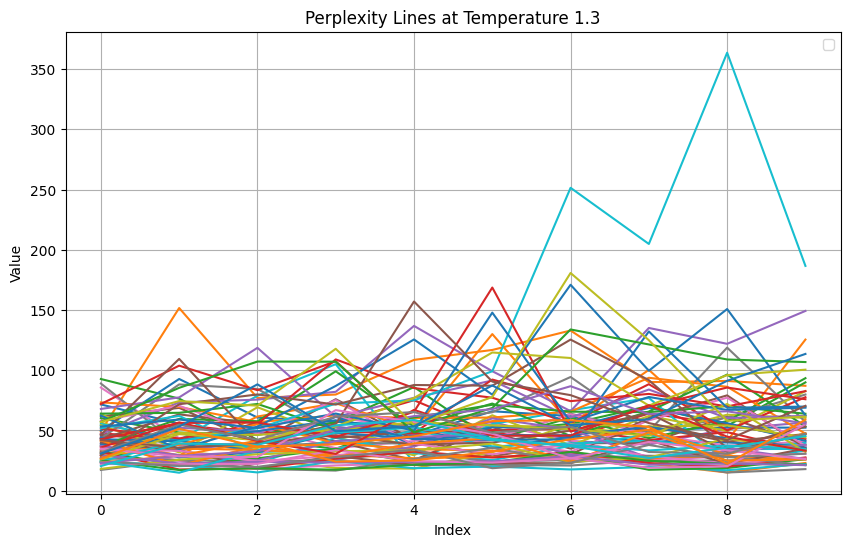

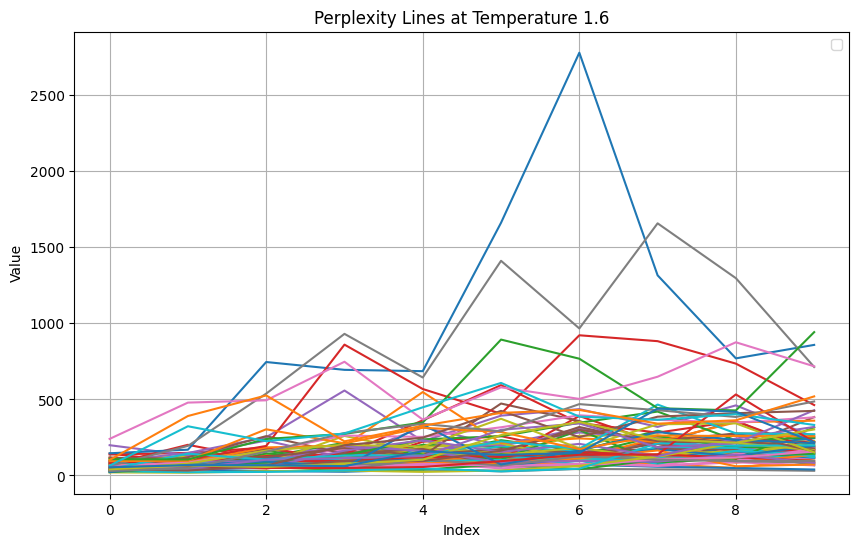

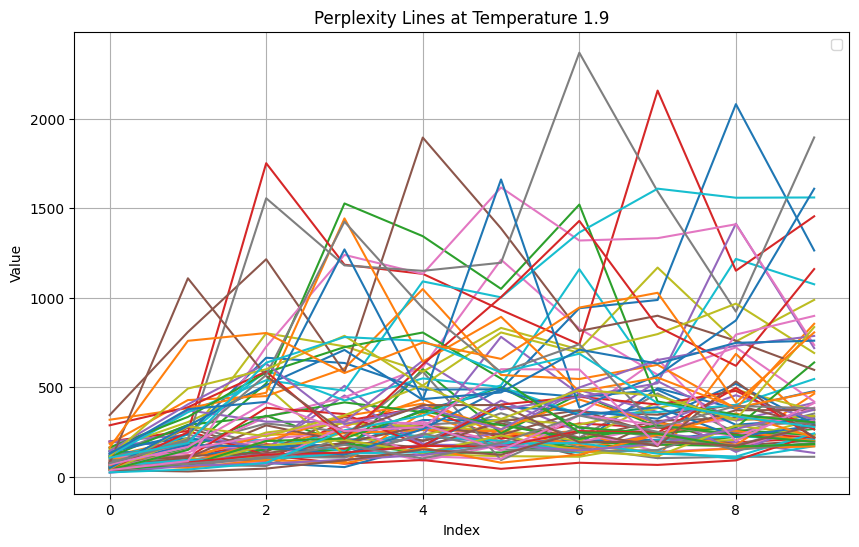

In [153]:
temperatures = perplexity_df["Temperature"].unique()

for temp in temperatures:
    temp_data = perplexity_df[perplexity_df["Temperature"] == temp]

    plt.figure(figsize=(10, 6))

    for index, row in temp_data.iterrows():
        ppls = row["ppls"]
        plt.plot(ppls)
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.title(f"Perplexity Lines at Temperature {temp}")
    plt.legend()
    plt.grid(True)
    plt.show()

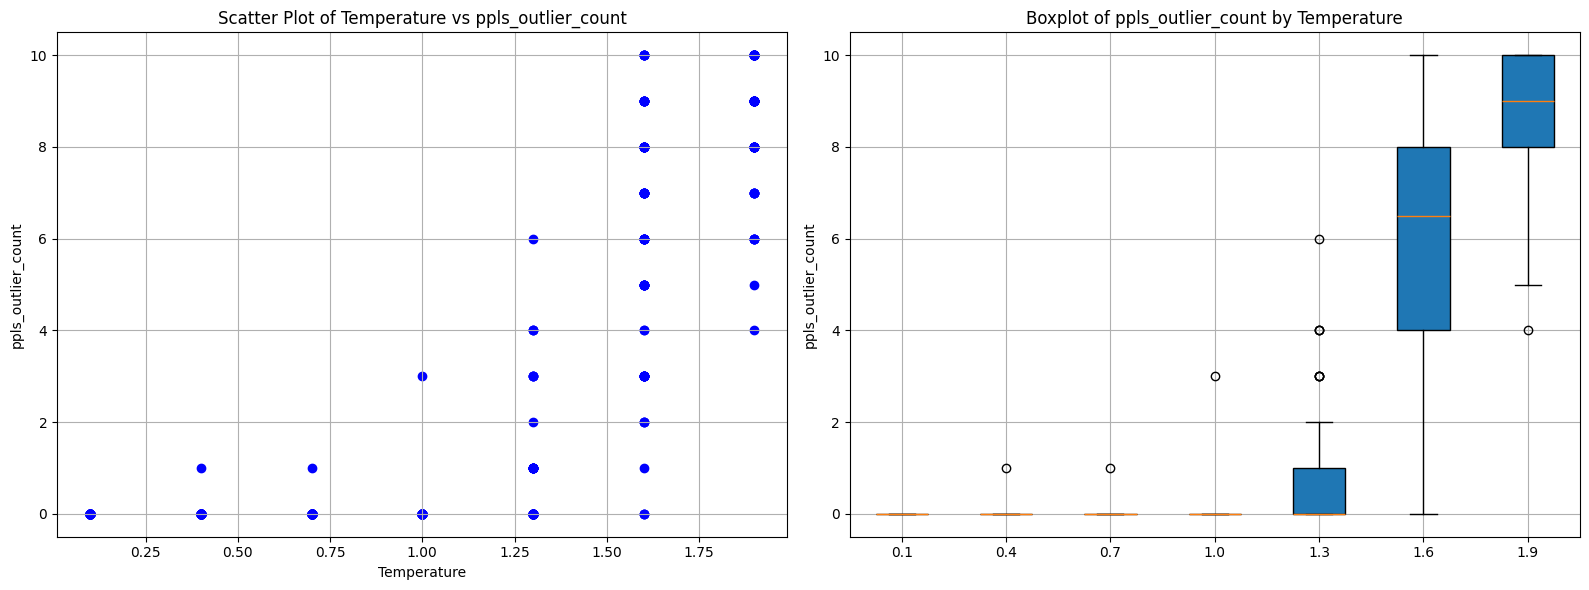

In [142]:
grouped = (
    perplexity_df.groupby("Temperature")["ppls_outlier_count"].apply(list).reset_index()
)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].scatter(
    perplexity_df["Temperature"],
    perplexity_df["ppls_outlier_count"],
    color="blue",
    marker="o",
)
ax[0].set_xlabel("Temperature")
ax[0].set_ylabel("ppls_outlier_count")
ax[0].set_title("Scatter Plot of Temperature vs ppls_outlier_count")
ax[0].grid(True)

ax[1].boxplot(
    [x for x in grouped["ppls_outlier_count"]],
    labels=grouped["Temperature"],
    patch_artist=True,
)
ax[1].set_ylabel("ppls_outlier_count")
ax[1].set_title("Boxplot of ppls_outlier_count by Temperature")
ax[1].grid(True)
plt.tight_layout()
plt.show()

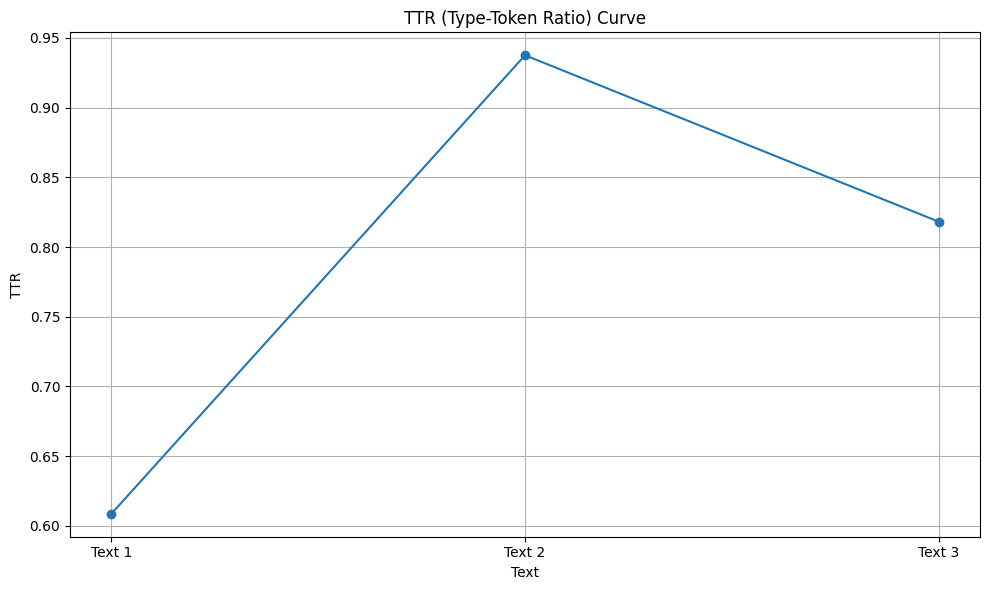

In [119]:
import matplotlib.pyplot as plt


def calculate_ttr(text):
    # tokens are nothing but words in the sentence
    words = text.split()
    # type
    unique_words = set(words)
    # The TTR value is always between 0 and 1, where higher values indicate greater lexical diversity.
    ttr = len(unique_words) / len(words)
    return ttr


def plot_ttr_curve(texts):
    ttrs = [calculate_ttr(text) for text in texts]
    plt.figure(figsize=(10, 6))
    plt.plot(ttrs, marker="o")
    plt.title("TTR (Type-Token Ratio) Curve")
    plt.xlabel("Text")
    plt.ylabel("TTR")
    plt.xticks(range(len(texts)), [f"Text {i+1}" for i in range(len(texts))])
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Example texts
texts = [
    "The cat sat on the mat. The cat is orange. The mat is brown. The cat and the mat are in the room.",
    "Text mining is an interesting field in natural language processing which is a subset of AI.",
    "Exploring the intricacies of quantum mechanics, researchers have unveiled new phenomena and insights into the behavior of subatomic particles. These groundbreaking discoveries are reshaping our understanding of the fundamental nature of the universe",
]

plot_ttr_curve(texts)